## Support Vector Machines
This consists the implementation of Support Vector Machines which performs better in some cases considering classfification problems and they also generalize better to model Non-Linear Boundaries when we use the Kernel  Methods for them and hence are used more often in comparison to Normal Logistic Regression Models which suffices well only for Linear Models, but cases considering linear models, both logistic regression and Linear SVM Models tend to have the same accuracy, while mostly we go for logistic regression as there are very less amount of parameters to be tuned.

We have showed the use of the scikit-learn library in how to import and tune the parameters to have a better model for the particular dataset.
The Scikit-Learn Library is also really rich in varied amounts of datasets and hence we have therefore imported the required datasets.
The Scikit-Learn Library consists of all the different types of models which we have implemented before with all types of parameter tuning options to get the best performance model.

In [10]:
## Importing the required libraries and modules
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from Decision_Boundary import plot_decision_boundary

### Preprocessing the Data
Here, We have used he respective modules of scikit-learn library to import the required methods and hence used them accordingly to preprocess the data and used the required parameters to show the model performance.
We have also standardized the data so that we have a better training performance and hence the model could learn the weights accordingly.

In [11]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1,stratify = y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

### Training the SVM Model
We have here trained the model according to the training dataset and hence plotted the decision boundary and hence shown that SVM are also good choice considering linear model classification.

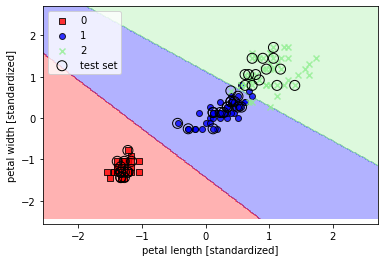

In [12]:
## Here we use the linear kernel as the variables are linearly separable
svm = SVC(kernel = 'linear',C=1.0,random_state = 1)
svm.fit(X_combined,y_combined)
plot_decision_boundary(X_combined,y_combined,classifier = svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [13]:
## The SGDClassifier in Scikit-Learn consists of all types of models which can tuned by us for better performance accordingly
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

### Non-Linear Classification
Here, we show that the SVM can be used for classifying non linear boundaries in the dimension space by using the kernel method on them and hence getting a better decision boundary.
To show the respective use of SVM we model random data which would have non linear boundaries with the help of XOR function.

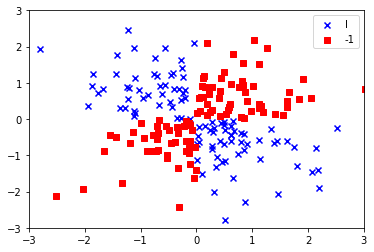

In [14]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0 , X_xor[:,1] > 0)
y_xor = np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1,1],
            c = 'b',marker = 'x',
            label = 'l')
plt.scatter(X_xor[y_xor == -1,0],
            X_xor[y_xor == -1,1],
            c = 'r',marker = 's',
            label = '-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.show()

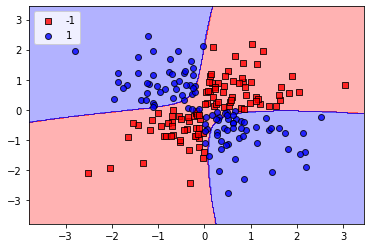

In [16]:
## Here, we use the rbf kernel which corresponds to the gausian kernel known popularly, you can read about it in the references link
## Hence, we can show that SVM are used to trace out non linear boundaries
svm = SVC(kernel = 'rbf',random_state = 1,gamma = 0.1,C = 10.0)
svm.fit(X_xor,y_xor)
plot_decision_boundary(X_xor,y_xor,classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

### Parameter Specification
We showed here that we can change the parameters required to train the SVM Model and hence achieve models which showcase the best used characteristics and here we showed the change in gamma or C variables and hence achieved different models with different parameters.
You can read about these specific parameters in the provided references

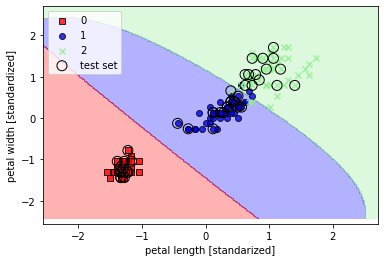

In [17]:
svm = SVC(kernel = 'rbf',random_state = 1,gamma = 0.2,C = 1.0)
svm.fit(X_train_std,y_train)
plot_decision_boundary(X_combined,y_combined,classifier = svm,test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

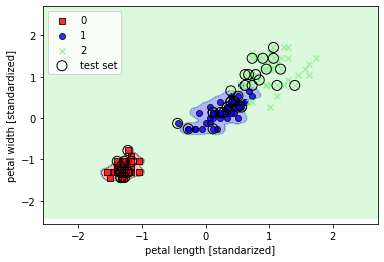

In [18]:
svm = SVC(kernel = 'rbf',random_state = 1,gamma = 100,C = 1.0)
svm.fit(X_train_std,y_train)
plot_decision_boundary(X_combined,y_combined,classifier = svm,test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()